In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr

In [2]:
files = [file for file in os.listdir('./parametros')]

param = pd.DataFrame()
for file in files:
  df = pd.read_csv('./parametros/'+file)
  param = pd.concat([param, df], axis= 0)

In [3]:
#param.to_excel('param.xlsx', index=False)

In [4]:
param

,Longitud de onda,Índice de absorción,Fracvol,Radio (nm),Espesor de la película (nm)
0,301,0.016685,1,10,100
1,302,0.016167,1,10,100
2,303,0.015703,1,10,100
3,304,0.015290,1,10,100
4,305,0.014916,1,10,100
...,...,...,...,...,...
19195,896,0.002255,1,9,120
19196,897,0.002257,1,9,120
19197,898,0.002258,1,9,120
19198,899,0.002260,1,9,120


In [5]:
cols = list(param.columns)

In [6]:
# Seleccionar las columnas de entrada y salida
entrada = ['Fracvol', 'Radio (nm)', 'Espesor de la película (nm)']
salida = ['Longitud de onda', 'Índice de absorción']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(param[entrada], param[salida], test_size=0.2, random_state=42)

In [7]:
learning_rate = 0.001
num_epochs = 10
batch_size = 32
loss = 0.01

In [8]:
# Crear objetos StandardScaler para normalizar los datos de entrada y salida
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Ajustar los objetos scaler a los datos de entrenamiento
scaler_X.fit(X_train)
scaler_y.fit(y_train)

# Aplicar la normalización a los datos de entrenamiento y prueba
X_train_norm = scaler_X.transform(X_train)
X_test_norm = scaler_X.transform(X_test)
y_train_norm = scaler_y.transform(y_train)
y_test_norm = scaler_y.transform(y_test)

In [9]:
# Definir la estructura de la red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2)
])

# Compilar la red neuronal
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mse')

In [10]:
history = model.fit(X_train_norm, y_train_norm, epochs=20, batch_size=8, validation_split=0.2)

Epoch 1/20
3072/3072 [==============================] - 3s 722us/step - loss: 0.0447 - val_loss: 0.0426
Epoch 2/20
3072/3072 [==============================] - 2s 704us/step - loss: 0.0441 - val_loss: 0.0427
Epoch 3/20
3072/3072 [==============================] - 2s 719us/step - loss: 0.0441 - val_loss: 0.0426
Epoch 4/20
3072/3072 [==============================] - 2s 719us/step - loss: 0.0441 - val_loss: 0.0437
Epoch 5/20
3072/3072 [==============================] - 2s 704us/step - loss: 0.0441 - val_loss: 0.0442
Epoch 6/20
3072/3072 [==============================] - 2s 717us/step - loss: 0.0441 - val_loss: 0.0431
Epoch 7/20
3072/3072 [==============================] - 2s 698us/step - loss: 0.0442 - val_loss: 0.0431
Epoch 8/20
3072/3072 [==============================] - 2s 698us/step - loss: 0.0442 - val_loss: 0.0428
Epoch 9/20
3072/3072 [==============================] - 2s 704us/step - loss: 0.0442 - val_loss: 0.0429
Epoch 10/20
3072/3072 [==============================] - 2s 699u

In [11]:
# Evaluar el rendimiento de la red neuronal
y_pred_norm = model.predict(X_test_norm)
loss = model.evaluate(X_test_norm, y_test_norm)

# Desnormalizar los resultados finales
y_pred_denorm = scaler_y.inverse_transform(y_pred_norm)
y_test_denorm = scaler_y.inverse_transform(y_test_norm)

240/240 [==============================] - 0s 622us/step - loss: 0.0442


In [12]:
pd.DataFrame(y_pred_denorm)

,0,1
0,606.90863,0.002709
1,606.90863,0.002709
2,606.90863,0.002709
3,606.90863,0.002709
4,606.90863,0.002709
...,...,...
7675,606.90863,0.002709
7676,606.90863,0.002709
7677,606.90863,0.002709
7678,606.90863,0.002709


In [13]:
pd.DataFrame(y_test_denorm)

,0,1
0,753.0,0.001533
1,310.0,0.014692
2,625.0,0.002815
3,604.0,0.000572
4,373.0,0.003104
...,...,...
7675,447.0,0.000520
7676,496.0,0.010435
7677,387.0,0.000280
7678,662.0,0.000139


In [14]:

# Calcular el error medio absoluto (MAE)
mae = mean_absolute_error(y_test_denorm, y_pred_denorm)
print('MAE:', mae)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test_denorm, y_pred_denorm)
print('MSE:', mse)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test_denorm, y_pred_denorm)
print('R^2:', r2)

MAE: 75.6360125262541
MSE: 15193.812679183417
R^2: -0.012787737404611255


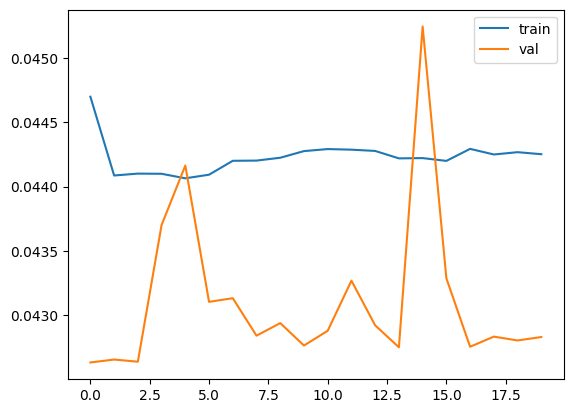

In [15]:
# Graficar la evolución del error a través de las épocas
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()